# Analyzing Rhode Island Traffic Stops 

In [1696]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

In [1697]:
df=pd.read_csv(r"C:\Users\Nevra\Desktop\traffic_stops.csv")

C:\Users\Nevra\AppData\Local\Temp\ipykernel_6688\2202931053.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Nevra\Desktop\traffic_stops.csv")


## Preparing the data for analysis

In [1698]:
df.head().sort_values("date")

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop
1,2,01/10/2005,12:20:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
2,3,01/10/2005,12:30:00,X3,white,female,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
3,4,01/10/2005,12:50:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
4,5,01/10/2005,13:10:00,X3,white,female,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
0,1,22/11/2005,11:15:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding


In [1699]:
df.dtypes

raw_row_number         int64
date                  object
time                  object
zone                  object
subject_race          object
subject_sex           object
department_id         object
type                  object
arrest_made           object
contraband_found      object
contraband_drugs      object
contraband_weapons    object
contraband_alcohol    object
reason_for_search     object
reason_for_stop       object
dtype: object

In [1700]:
df.shape

(509681, 15)

In [1701]:
df.drop("raw_row_number",axis="columns",inplace=True)

In [1702]:
df.shape

(509681, 14)

In [1703]:
df.isnull().sum()

date                      10
time                      10
zone                      10
subject_race           29073
subject_sex            29097
department_id             10
type                       0
arrest_made            29073
contraband_found      491919
contraband_drugs      493693
contraband_weapons    497886
contraband_alcohol    508464
reason_for_search     491919
reason_for_stop        29073
dtype: int64

In [1704]:
df.dropna(subset=["date"],inplace=True)

In [1705]:
df.shape

(509671, 14)

In [1706]:
df.isnull().sum()

date                       0
time                       0
zone                       0
subject_race           29063
subject_sex            29087
department_id              0
type                       0
arrest_made            29063
contraband_found      491909
contraband_drugs      493683
contraband_weapons    497876
contraband_alcohol    508454
reason_for_search     491909
reason_for_stop        29063
dtype: int64

In [1707]:
df["arrest_made"]=df.arrest_made.astype("boolean")

In [1708]:
df["subject_sex"]=df.subject_sex.astype("category")
df["subject_race"]=df.subject_race.astype("category")
df["reason_for_stop"]=df.reason_for_stop.astype("category")
df["zone"]=df.zone.astype("category")

In [1709]:
df["contraband_found"]=df.contraband_found.astype("boolean")
df["contraband_drugs"]=df.contraband_drugs.astype("boolean")
df["contraband_weapons"]=df.contraband_weapons.astype("boolean")
df["contraband_alcohol"]=df.contraband_alcohol.astype("boolean")


In [1710]:
df.dtypes

date                    object
time                    object
zone                  category
subject_race          category
subject_sex           category
department_id           object
type                    object
arrest_made            boolean
contraband_found       boolean
contraband_drugs       boolean
contraband_weapons     boolean
contraband_alcohol     boolean
reason_for_search       object
reason_for_stop       category
dtype: object

In [1711]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop
0,22/11/2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
1,01/10/2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
2,01/10/2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
3,01/10/2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
4,01/10/2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding


In [1712]:
df["date"]=df.date.str.replace("/","-")

In [1713]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop
0,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
1,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
3,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding


In [1714]:
combined=df.date.str.cat(df.time,sep=" ")

In [1715]:
df["date_time"]=pd.to_datetime(combined)

In [1716]:
df.date_time

0        2005-11-22 11:15:00
1        2005-01-10 12:20:00
2        2005-01-10 12:30:00
3        2005-01-10 12:50:00
4        2005-01-10 13:10:00
                 ...        
509675   2015-08-16 13:37:00
509676   2015-04-08 10:40:00
509677   2015-12-20 11:17:00
509678   2015-09-11 23:35:00
509679   2015-10-30 11:09:00
Name: date_time, Length: 509671, dtype: datetime64[ns]

In [1717]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time
0,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-11-22 11:15:00
1,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:20:00
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:30:00
3,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:50:00
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 13:10:00


### Exploring the relationship between gender and policing

In [1718]:
df.subject_sex.value_counts()

male      349446
female    131138
Name: subject_sex, dtype: int64

In [1719]:
sex_counts=df.subject_sex.value_counts(normalize=True)
sex_counts

male      0.727128
female    0.272872
Name: subject_sex, dtype: float64

Text(0, 0.5, '')

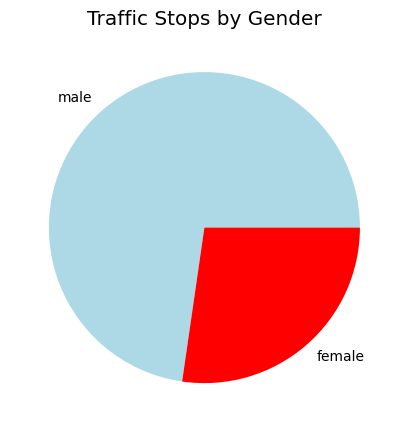

In [1720]:
sex_counts.plot(kind="pie",colors=["lightblue","red"],title="Traffic Stops by Gender")
plt.ylabel("")

In [1721]:
female=df[df["subject_sex"]=="female"]

In [1722]:
male=df[df["subject_sex"]=="male"]

In [1723]:
arrested=df[df["arrest_made"]==True]

In [1724]:
arrested_by_sex=arrested.subject_sex.value_counts(normalize=True).sort_values()
arrested_by_sex

female    0.201349
male      0.798651
Name: subject_sex, dtype: float64

Text(0, 0.5, '')

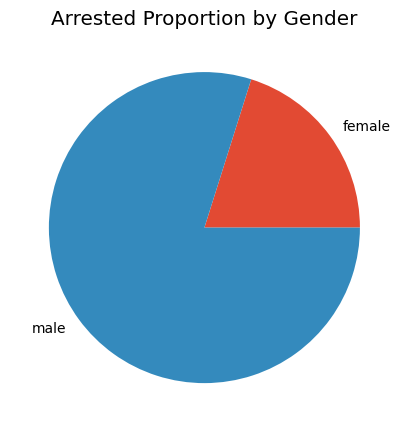

In [1725]:
arrested_by_sex.plot(kind="pie",title="Arrested Proportion by Gender")
plt.ylabel("")

In [1726]:
arrested_by_race=arrested.subject_race.value_counts(normalize=True)
arrested_by_race

white                     0.556345
black                     0.237186
hispanic                  0.190086
asian/pacific islander    0.015539
other                     0.000843
Name: subject_race, dtype: float64

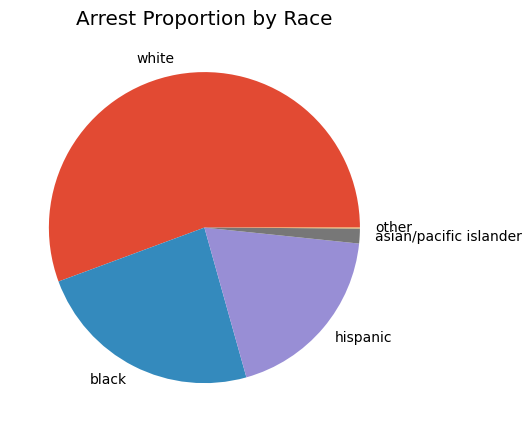

In [1727]:
arrested_by_race.plot(kind="pie",radius=1)
plt.ylabel("")
plt.title("Arrest Proportion by Race",loc="center")
plt.style.use("ggplot")

In [1728]:
pd.crosstab(arrested.subject_race,arrested.subject_sex).sort_values(by="male")

subject_sex,female,male
subject_race,,
other,2,12
asian/pacific islander,42,216
hispanic,461,2695
black,766,3172
white,2072,7165


<AxesSubplot:title={'center':'Arrested Proportion by  Race'}, xlabel='subject_race'>

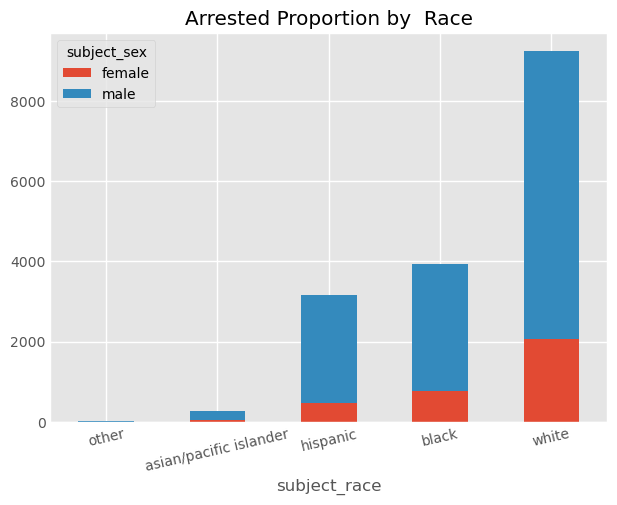

In [1729]:
pd.crosstab(arrested.subject_race,arrested.subject_sex).sort_values(by="male").plot(kind="bar",title="Arrested Proportion by  Race",stacked=True,rot=13)

In [1730]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [1731]:
df.columns

Index(['date', 'time', 'zone', 'subject_race', 'subject_sex', 'department_id',
       'type', 'arrest_made', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'reason_for_search',
       'reason_for_stop', 'date_time'],
      dtype='object')

In [1732]:
df.groupby(["subject_race","subject_sex"])["arrest_made"].mean()

subject_race            subject_sex
asian/pacific islander  female         0.014194
                        male           0.021896
black                   female         0.051897
                        male            0.05894
hispanic                female         0.044927
                        male           0.062876
other                   female         0.007843
                        male           0.011019
white                   female         0.020135
                        male            0.02963
Name: arrest_made, dtype: Float64

In [1733]:
df.reason_for_stop.value_counts()

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [1734]:
female_reason_for_stop=df[df.subject_sex=="female"].reason_for_stop.value_counts(normalize=True)
female_reason_for_stop

Speeding                            0.657308
Other Traffic Violation             0.136581
Equipment/Inspection Violation      0.107055
Registration Violation              0.043077
Seatbelt Violation                  0.027071
Call for Service                    0.018057
Special Detail/Directed Patrol      0.005071
Motorist Assist/Courtesy            0.002532
Violation of City/Town Ordinance    0.001647
APB                                 0.000831
Suspicious Person                   0.000564
Warrant                             0.000206
Name: reason_for_stop, dtype: float64

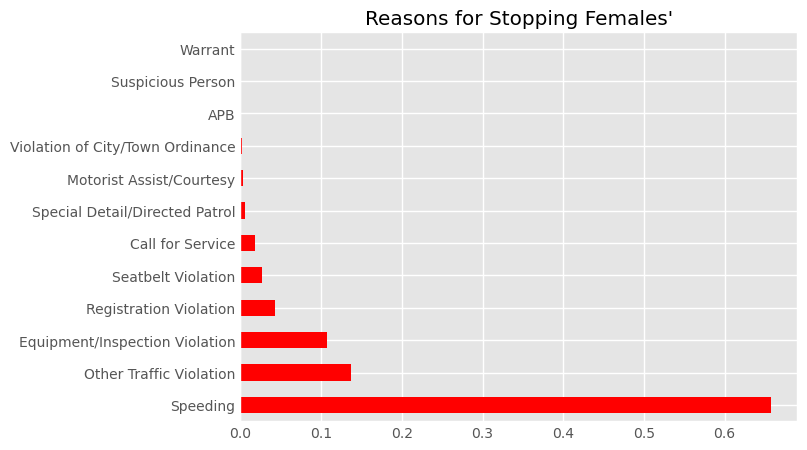

In [1735]:
female_reason_for_stop.plot(kind="barh", title="Reasons for Stopping Females'",color="Red")
plt.style.use("ggplot")

In [1736]:
male_reason_for_stop=df[df.subject_sex=="male"].reason_for_stop.value_counts(normalize=True)
male_reason_for_stop

Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB                                 0.001076
Suspicious Person                   0.000767
Warrant                             0.000258
Name: reason_for_stop, dtype: float64

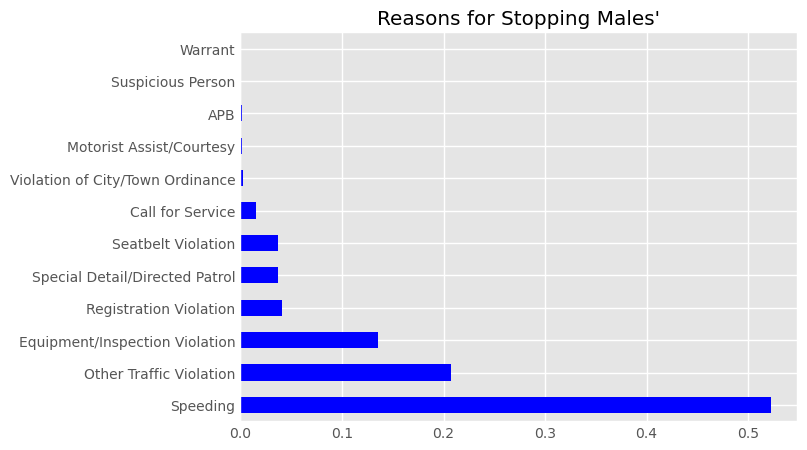

In [1737]:
male_reason_for_stop.plot(kind="barh", title="Reasons for Stopping Males'",color="Blue")
plt.style.use("ggplot")

In [1738]:
sex_reason_for_stop=df.groupby(["subject_sex"]).reason_for_stop.value_counts()

In [1739]:
sex_reason_for_stop

subject_sex                                  
female       Speeding                             86198
             Other Traffic Violation              17911
             Equipment/Inspection Violation       14039
             Registration Violation                5649
             Seatbelt Violation                    3550
             Call for Service                      2368
             Special Detail/Directed Patrol         665
             Motorist Assist/Courtesy               332
             Violation of City/Town Ordinance       216
             APB                                    109
             Suspicious Person                       74
             Warrant                                 27
male         Speeding                            182538
             Other Traffic Violation              72317
             Equipment/Inspection Violation       47211
             Registration Violation               14181
             Special Detail/Directed Patrol       12977
  

In [1740]:
df.groupby(["reason_for_stop","subject_sex",]).arrest_made.mean()

reason_for_stop                   subject_sex
APB                               female         0.192661
                                  male           0.292553
Call for Service                  female         0.141047
                                  male           0.199351
Equipment/Inspection Violation    female         0.061614
                                  male           0.060028
Motorist Assist/Courtesy          female         0.066265
                                  male            0.12481
Other Traffic Violation           female          0.05438
                                  male           0.058008
Registration Violation            female         0.078598
                                  male           0.088781
Seatbelt Violation                female         0.021972
                                  male           0.028026
Special Detail/Directed Patrol    female         0.033083
                                  male           0.007475
Speeding                  

In [1741]:
sex_reason_for_stop.items()

In [1742]:
sex_reason_for_stop

subject_sex                                  
female       Speeding                             86198
             Other Traffic Violation              17911
             Equipment/Inspection Violation       14039
             Registration Violation                5649
             Seatbelt Violation                    3550
             Call for Service                      2368
             Special Detail/Directed Patrol         665
             Motorist Assist/Courtesy               332
             Violation of City/Town Ordinance       216
             APB                                    109
             Suspicious Person                       74
             Warrant                                 27
male         Speeding                            182538
             Other Traffic Violation              72317
             Equipment/Inspection Violation       47211
             Registration Violation               14181
             Special Detail/Directed Patrol       12977
  

In [1743]:
female_arrest=df[(df.arrest_made==True) & (df.subject_sex=="female")]

In [1744]:
female_arrest.reason_for_stop.value_counts()

Other Traffic Violation             974
Equipment/Inspection Violation      865
Speeding                            545
Registration Violation              444
Call for Service                    334
Seatbelt Violation                   78
Motorist Assist/Courtesy             22
Special Detail/Directed Patrol       22
APB                                  21
Warrant                              15
Violation of City/Town Ordinance     12
Suspicious Person                    11
Name: reason_for_stop, dtype: int64

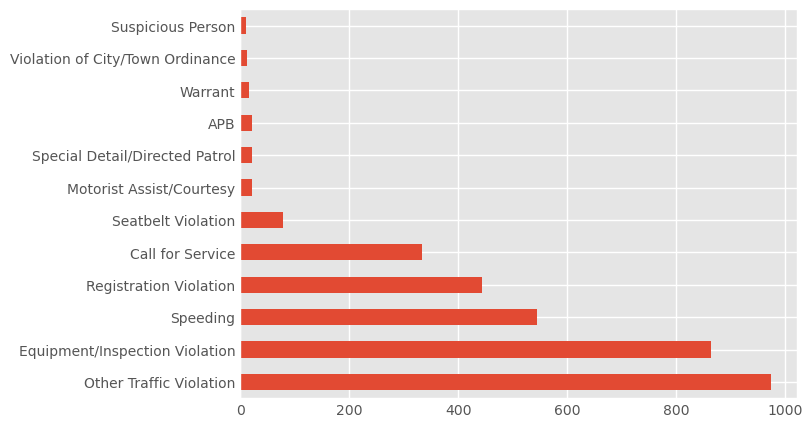

In [1745]:
female_arrest["reason_for_stop"].value_counts().plot(kind="barh")
plt.style.use("ggplot")

In [1746]:
male_arrest=df[(df.arrest_made==True) & (df.subject_sex=="male")]

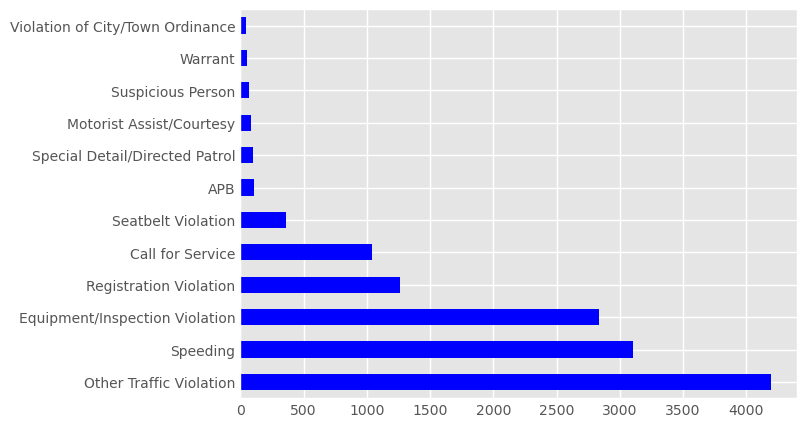

In [1747]:
male_arrest["reason_for_stop"].value_counts().plot(kind="barh",color="Blue")
plt.style.use("ggplot")

In [1748]:
male_arrest["reason_for_stop"].value_counts().sum()

13260

In [1749]:
female_arrest["reason_for_stop"].value_counts().sum()

3343

In [1750]:
## Comparing Speeding Arrests by Gender

In [1751]:
female_arrest[female_arrest.reason_for_stop=="Speeding"].shape

(545, 15)

In [1752]:
male_arrest[male_arrest.reason_for_stop=="Speeding"].shape

(3109, 15)

In [1753]:
female_arrest_speeding=female_arrest[female_arrest.reason_for_stop=="Speeding"]

In [1754]:
### Comparing Speeding Arrests and Alcohol Controls by Gender

In [1755]:
female_arrest_speeding["contraband_alcohol"].value_counts(normalize=True)

True     0.882353
False    0.117647
Name: contraband_alcohol, dtype: Float64

In [1756]:
male_arrest_speeding=male_arrest[male_arrest.reason_for_stop=="Speeding"]

In [1757]:
male_arrest_speeding["contraband_alcohol"].value_counts(normalize=True)

True     0.927007
False    0.072993
Name: contraband_alcohol, dtype: Float64

In [1758]:
df.arrest_made.mean()

0.034545825287968575

In [1759]:
male_arrest_speeding.contraband_alcohol.mean()

0.927007299270073

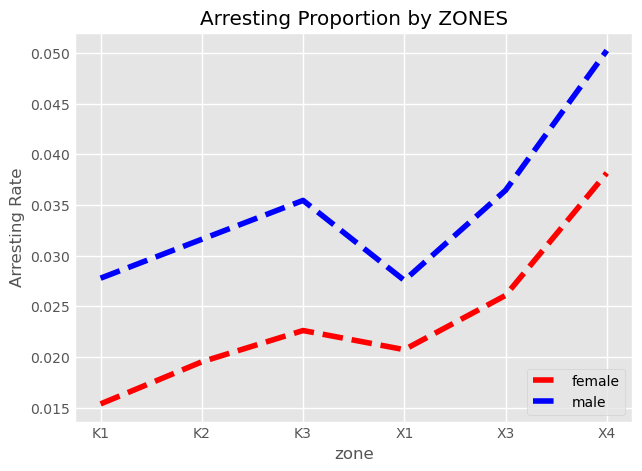

In [1760]:
female.groupby("zone")["arrest_made"].mean().plot(kind="line",color="red",linestyle="--",title="Arresting Proportion by ZONES", ylabel="Arresting Rate")
male.groupby("zone")["arrest_made"].mean().plot(kind="line", color="blue",linestyle="--")
plt.legend(["female","male"],frameon=True,loc="lower right")
plt.style.use("ggplot")

In [1761]:
df.zone.unique()

['X3', 'X4', 'K3', 'K2', 'K1', 'X1']
Categories (6, object): ['K1', 'K2', 'K3', 'X1', 'X3', 'X4']

In [1762]:
df.groupby(["zone","subject_sex"]).arrest_made.mean()

zone  subject_sex
K1    female         0.015374
      male           0.027779
K2    female         0.019528
      male           0.031619
K3    female         0.022614
      male           0.035451
X1    female         0.020725
      male           0.027561
X3    female         0.026076
      male           0.036446
X4    female         0.038155
      male           0.050246
Name: arrest_made, dtype: Float64

In [1763]:
df.reason_for_stop.unique()

['Speeding', 'Other Traffic Violation', 'Equipment/Inspection Violation', 'Motorist Assist/Courtesy', 'Registration Violation', ..., 'Special Detail/Directed Patrol', 'APB', 'Warrant', 'Suspicious Person', 'Seatbelt Violation']
Length: 13
Categories (12, object): ['APB', 'Call for Service', 'Equipment/Inspection Violation', 'Motorist Assist/Courtesy', ..., 'Speeding', 'Suspicious Person', 'Violation of City/Town Ordinance', 'Warrant']

In [1764]:
df.reason_for_stop.value_counts()

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [1765]:
df["violation"]=df.reason_for_stop.str.contains("Violation",na=False)

In [1766]:
df.violation.sum()

188679

In [1767]:
df.groupby("subject_sex").violation.mean()

subject_sex
female    0.315431
male      0.421533
Name: violation, dtype: float64

In [1768]:
df.groupby("subject_sex").violation.mean()

subject_sex
female    0.315431
male      0.421533
Name: violation, dtype: float64

In [1769]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time,violation
0,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-11-22 11:15:00,False
1,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:20:00,False
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:30:00,False
3,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:50:00,False
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 13:10:00,False


In [1770]:
df.set_index("date_time",inplace=True)

In [1771]:
df.index

DatetimeIndex(['2005-11-22 11:15:00', '2005-01-10 12:20:00',
               '2005-01-10 12:30:00', '2005-01-10 12:50:00',
               '2005-01-10 13:10:00', '2005-01-10 15:50:00',
               '2005-11-09 11:45:00', '2005-11-09 11:45:00',
               '2005-04-10 11:55:00', '2005-04-10 11:55:00',
               ...
               '2015-12-27 12:45:00', '2015-12-27 13:43:00',
               '2015-12-28 02:29:00', '2015-12-30 11:42:00',
               '2015-09-11 00:23:00', '2015-08-16 13:37:00',
               '2015-04-08 10:40:00', '2015-12-20 11:17:00',
               '2015-09-11 23:35:00', '2015-10-30 11:09:00'],
              dtype='datetime64[ns]', name='date_time', length=509671, freq=None)

In [1772]:
df.index.month

Int64Index([11,  1,  1,  1,  1,  1, 11, 11,  4,  4,
            ...
            12, 12, 12, 12,  9,  8,  4, 12,  9, 10],
           dtype='int64', name='date_time', length=509671)

In [1773]:
monthly_arrest_rate=df.groupby(df.index.month).arrest_made.mean()

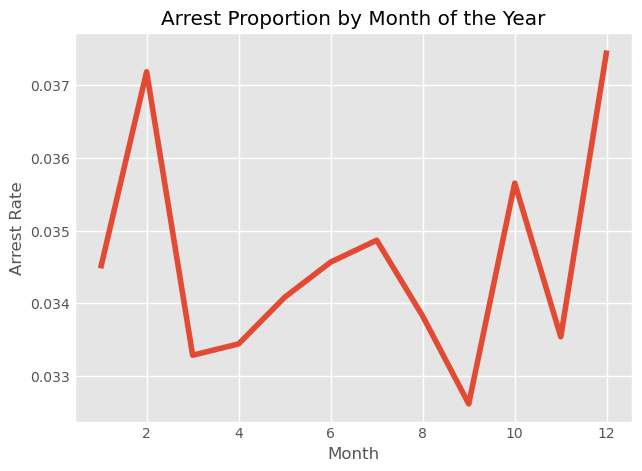

In [1774]:
monthly_arrest_rate.plot()
plt.xlabel("Month")
plt.ylabel("Arrest Rate")
plt.title("Arrest Proportion by Month of the Year")
plt.style.use("ggplot")

In [1775]:
hourly_arrest_rate=df.groupby(df.index.hour).arrest_made.mean()
hourly_arrest_rate

date_time
0     0.052142
1     0.067121
2     0.061063
3     0.052604
4     0.053897
5     0.032657
6     0.012948
7     0.013829
8     0.019714
9     0.024698
10    0.025582
11    0.027078
12    0.031359
13    0.030248
14    0.031529
15    0.032124
16    0.033519
17    0.038989
18    0.039898
19    0.031366
20    0.039292
21    0.059956
22     0.04398
23    0.045084
Name: arrest_made, dtype: Float64

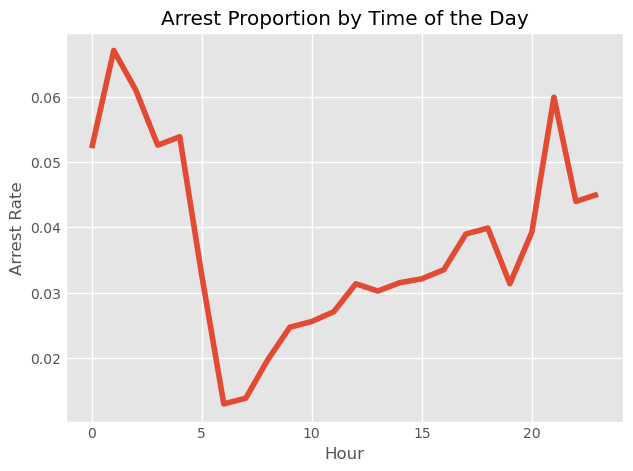

In [1776]:
hourly_arrest_rate.plot()
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Proportion by Time of the Day")
plt.style.use("ggplot")
plt.show()

In [1777]:
female.head()


,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:30:00
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 13:10:00
7,11-09-2005,11:45:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-11-09 11:45:00
10,04-10-2005,14:28:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-04-10 14:28:00
15,10-10-2005,18:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,2005-10-10 18:10:00


In [1778]:
female.set_index("date_time",inplace=True)
male.set_index("date_time",inplace=True)

In [1779]:
df.subject_sex.value_counts()

male      349446
female    131138
Name: subject_sex, dtype: int64

In [1780]:
annual_female_arrest=female.resample("A").arrest_made.count()
annual_female_arrest

date_time
2005-12-31     3699
2006-12-31    15695
2007-12-31    14481
2008-12-31    11819
2009-12-31     9594
2010-12-31     9886
2011-12-31    10800
2012-12-31    16072
2013-12-31    12245
2014-12-31    14079
2015-12-31    12768
Freq: A-DEC, Name: arrest_made, dtype: int64

In [1781]:
annual_male_arrest=male.resample("A").arrest_made.count()
annual_male_arrest

date_time
2005-12-31    10110
2006-12-31    39857
2007-12-31    35658
2008-12-31    33751
2009-12-31    30226
2010-12-31    29554
2011-12-31    31830
2012-12-31    41553
2013-12-31    29677
2014-12-31    34799
2015-12-31    32431
Freq: A-DEC, Name: arrest_made, dtype: int64

In [1782]:
annuel_arrest=pd.concat([annual_female_arrest,annual_male_arrest],axis='columns')
annuel_arrest

,arrest_made,arrest_made
date_time,,
2005-12-31,3699,10110
2006-12-31,15695,39857
2007-12-31,14481,35658
2008-12-31,11819,33751
2009-12-31,9594,30226
2010-12-31,9886,29554
2011-12-31,10800,31830
2012-12-31,16072,41553
2013-12-31,12245,29677


In [1783]:
annuel_arrest.columns

Index(['arrest_made', 'arrest_made'], dtype='object')

In [1784]:
annuel_arrest.columns=["female_arrest","male_arrest"]

In [1785]:
annuel_arrest

,female_arrest,male_arrest
date_time,,
2005-12-31,3699,10110
2006-12-31,15695,39857
2007-12-31,14481,35658
2008-12-31,11819,33751
2009-12-31,9594,30226
2010-12-31,9886,29554
2011-12-31,10800,31830
2012-12-31,16072,41553
2013-12-31,12245,29677


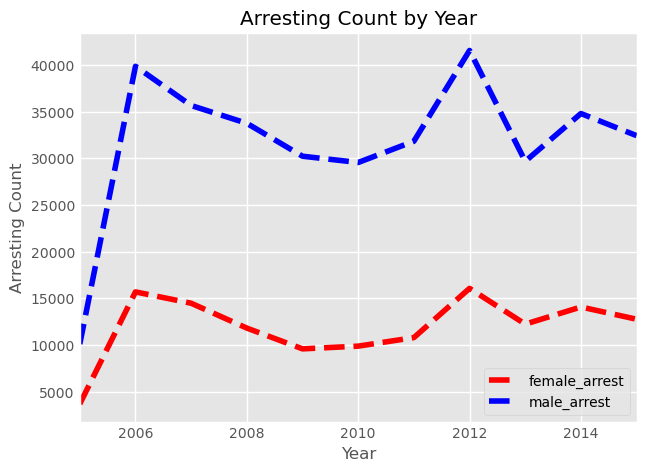

In [1786]:
annuel_arrest.plot(style="--",color="rb")
plt.xlabel("Year")
plt.ylabel("Arresting Count")
plt.title("Arresting Count by Year")
plt.style.use("ggplot")
plt.legend(frameon=True,loc="lower right")

In [1787]:
annuel_contraband_found=df.contraband_found.resample("A").mean()
annuel_contraband_found

date_time
2005-12-31    0.262857
2006-12-31    0.275632
2007-12-31    0.308389
2008-12-31    0.312986
2009-12-31    0.332997
2010-12-31    0.354819
2011-12-31    0.387578
2012-12-31    0.406989
2013-12-31    0.493432
2014-12-31    0.503392
2015-12-31    0.502385
Freq: A-DEC, Name: contraband_found, dtype: Float64

In [1788]:
annuel_contraband_drugs=df.contraband_drugs.resample("A").mean()
annuel_contraband_drugs


date_time
2005-12-31    0.177033
2006-12-31    0.193582
2007-12-31     0.22524
2008-12-31    0.217172
2009-12-31    0.238669
2010-12-31     0.27027
2011-12-31    0.329939
2012-12-31    0.349971
2013-12-31    0.445837
2014-12-31    0.467683
2015-12-31    0.433484
Freq: A-DEC, Name: contraband_drugs, dtype: Float64

In [1789]:
annuel_contraband_weapons=df.contraband_weapons.resample("A").mean()
annuel_contraband_weapons

date_time
2005-12-31    0.045872
2006-12-31    0.032704
2007-12-31    0.043762
2008-12-31    0.048276
2009-12-31     0.03701
2010-12-31    0.043363
2011-12-31    0.035645
2012-12-31    0.037359
2013-12-31    0.047401
2014-12-31    0.050441
2015-12-31    0.060294
Freq: A-DEC, Name: contraband_weapons, dtype: Float64

In [1790]:
annuel_contraband_alcohol=df.contraband_alcohol.resample("A").mean()
annuel_contraband_alcohol

date_time
2005-12-31    0.946429
2006-12-31    0.958904
2007-12-31    0.942857
2008-12-31    0.970149
2009-12-31    0.952381
2010-12-31        0.92
2011-12-31    0.854369
2012-12-31    0.983051
2013-12-31    0.911392
2014-12-31    0.704545
2015-12-31    0.901961
Freq: A-DEC, Name: contraband_alcohol, dtype: Float64

In [1791]:
annuel_contraband_all=pd.concat([annuel_contraband_found,annuel_contraband_drugs,annuel_contraband_weapons,annuel_contraband_alcohol],axis="columns")
annuel_contraband_all

,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol
date_time,,,,
2005-12-31,0.262857,0.177033,0.045872,0.946429
2006-12-31,0.275632,0.193582,0.032704,0.958904
2007-12-31,0.308389,0.22524,0.043762,0.942857
2008-12-31,0.312986,0.217172,0.048276,0.970149
2009-12-31,0.332997,0.238669,0.03701,0.952381
2010-12-31,0.354819,0.27027,0.043363,0.92
2011-12-31,0.387578,0.329939,0.035645,0.854369
2012-12-31,0.406989,0.349971,0.037359,0.983051
2013-12-31,0.493432,0.445837,0.047401,0.911392


Text(0.5, 0, 'Year')

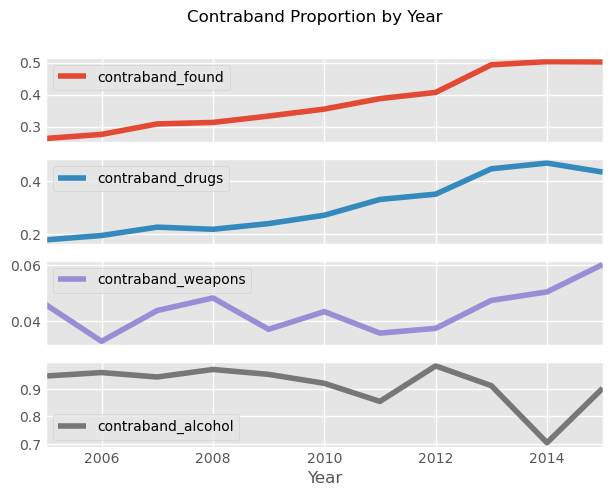

In [1792]:
annuel_contraband_all.plot(subplots="True",title="Contraband Proportion by Year")
plt.xlabel("Year")


In [1793]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
date_time,,,,,,,,,,,,,,,
2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [1794]:
df.arrest_made.value_counts()

False    464005
True      16603
Name: arrest_made, dtype: Int64

In [1795]:
df.zone

date_time
2005-11-22 11:15:00    X3
2005-01-10 12:20:00    X3
2005-01-10 12:30:00    X3
2005-01-10 12:50:00    X3
2005-01-10 13:10:00    X3
                       ..
2015-08-16 13:37:00    X1
2015-04-08 10:40:00    X3
2015-12-20 11:17:00    K3
2015-09-11 23:35:00    X4
2015-10-30 11:09:00    X4
Name: zone, Length: 509671, dtype: category
Categories (6, object): ['K1', 'K2', 'K3', 'X1', 'X3', 'X4']

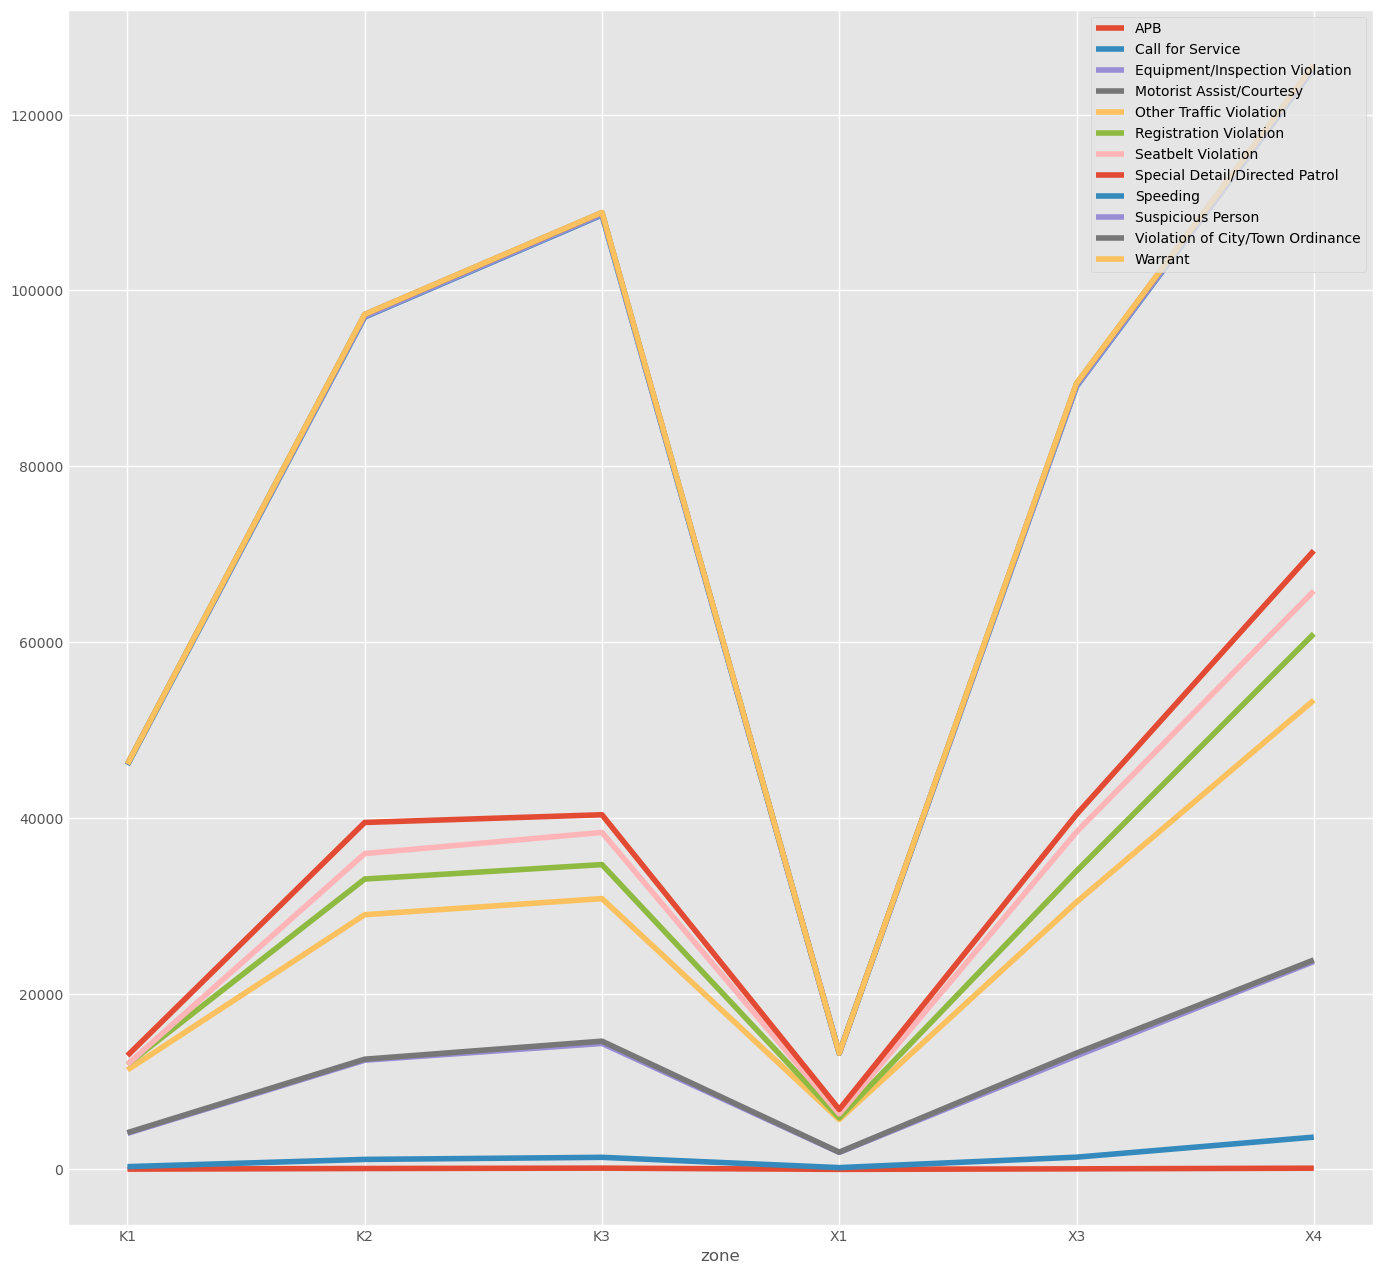

In [1796]:
df_zone_reason_for_stop=pd.crosstab(df.zone,df.reason_for_stop)
df_zone_reason_for_stop.plot(kind="line",figsize=(15,15),stacked=True)
plt.legend(loc="upper right")



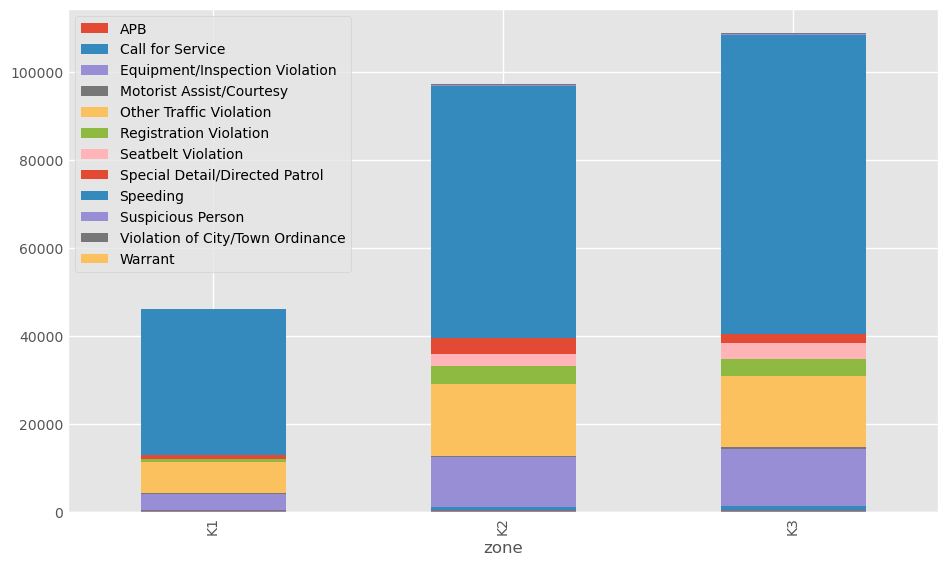

In [1797]:
df_zone_reason_for_stop.loc["K1":"K3"].plot(figsize=(10,6.2),kind="bar",stacked=True)
plt.legend(loc="upper left")

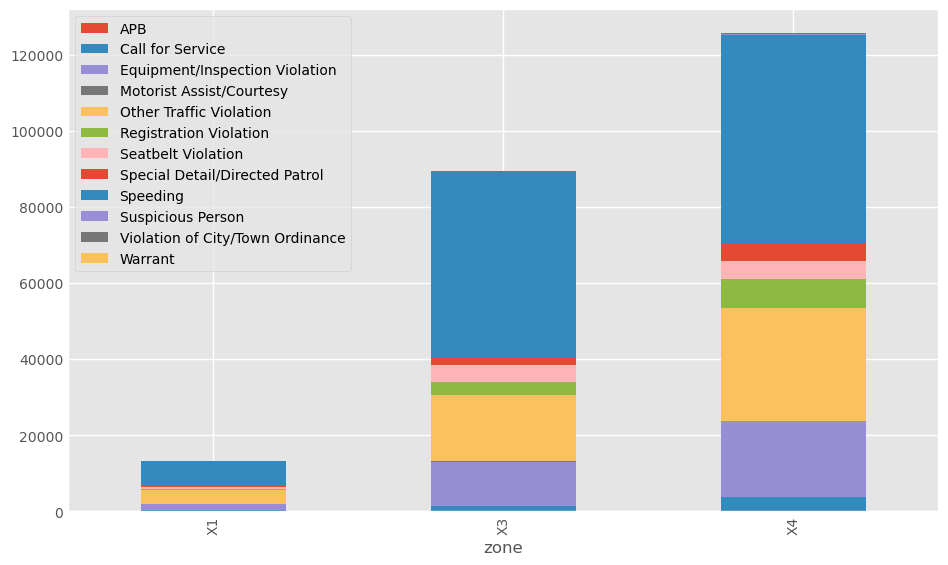

In [1798]:
df_zone_reason_for_stop.loc["X1":"X4"].plot(kind="bar",figsize=(10,6.2),stacked=True)
plt.legend(loc="upper left")

In [1799]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
date_time,,,,,,,,,,,,,,,
2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [1800]:
weather=pd.read_csv(r"C:\Users\Nevra\Desktop\Rhode_Island_Climate_Data2.csv")
weather

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
0,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",01/10/2005,5.37,1432.0,NaN,0.00,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",02/10/2005,2.91,1510.0,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",03/10/2005,4.03,1457.0,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",04/10/2005,4.47,1547.0,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",05/10/2005,3.80,1515.0,NaN,0.00,0.0,0.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",27/12/2015,9.17,NaN,NaN,0.20,0.0,0.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3740,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",28/12/2015,12.30,NaN,NaN,0.00,0.0,0.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3741,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",29/12/2015,12.53,NaN,NaN,0.70,0.6,0.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3742,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",30/12/2015,6.93,NaN,NaN,0.01,0.0,0.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1801]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,3744.000000,1005.000000,3744.000000
mean,43.367788,53.215920,61.130609
std,16.876732,17.573016,18.005692
min,-5.000000,6.000000,15.000000
25%,30.000000,40.000000,47.000000
50%,43.500000,55.000000,62.000000
75%,58.000000,69.000000,76.000000
max,77.000000,86.000000,102.000000


<AxesSubplot:>

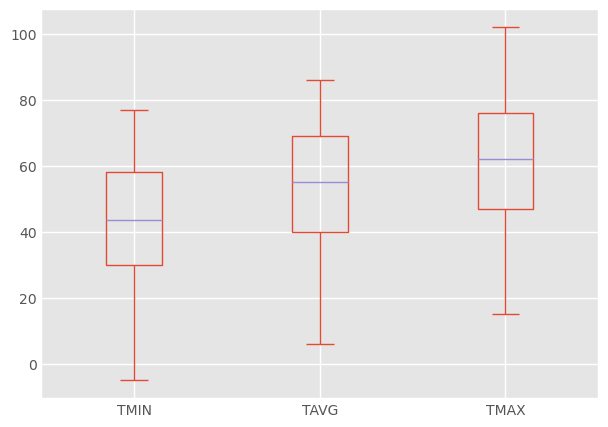

In [1802]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind='box')

In [1803]:
weather["TDIFF"]=weather["TMAX"]-weather["TMIN"]

In [1804]:
weather[["TMIN", "TAVG", "TMAX","TDIFF"]]

,TMIN,TAVG,TMAX,TDIFF
0,44,NaN,68,24
1,48,NaN,75,27
2,51,NaN,72,21
3,57,NaN,72,15
4,59,NaN,75,16
...,...,...,...,...
3739,44,51.0,61,17
3740,30,40.0,44,14
3741,28,33.0,40,12
3742,27,30.0,35,8


In [1805]:
weather.TDIFF.describe()

count    3744.000000
mean       17.762821
std         6.328301
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

<AxesSubplot:ylabel='Frequency'>

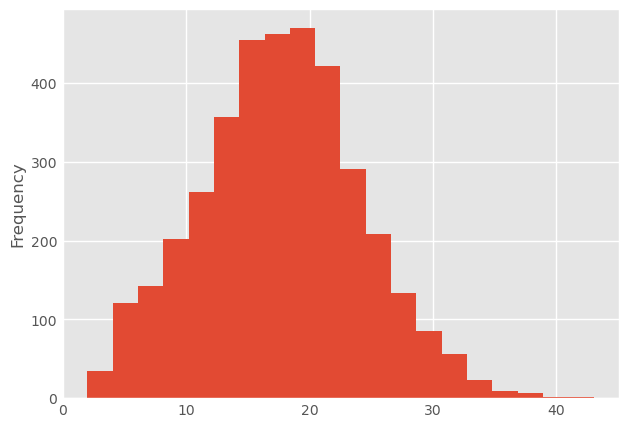

In [1806]:
weather.TDIFF.plot(kind="hist",bins=20)

In [1807]:
""" 
WT is "weather types"
WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain

"""

WT = weather.loc[:,"WT01":"WT22"]
WT

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3741,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3742,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1808]:
weather['bad_conditions'] = WT.sum(axis="columns")
weather['bad_conditions']

0       0.0
1       2.0
2       2.0
3       3.0
4       4.0
       ... 
3739    1.0
3740    0.0
3741    3.0
3742    2.0
3743    1.0
Name: bad_conditions, Length: 3744, dtype: float64

In [1809]:
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')
weather['bad_conditions']

0       0
1       2
2       2
3       3
4       4
       ..
3739    1
3740    0
3741    3
3742    2
3743    1
Name: bad_conditions, Length: 3744, dtype: int32

<AxesSubplot:ylabel='Frequency'>

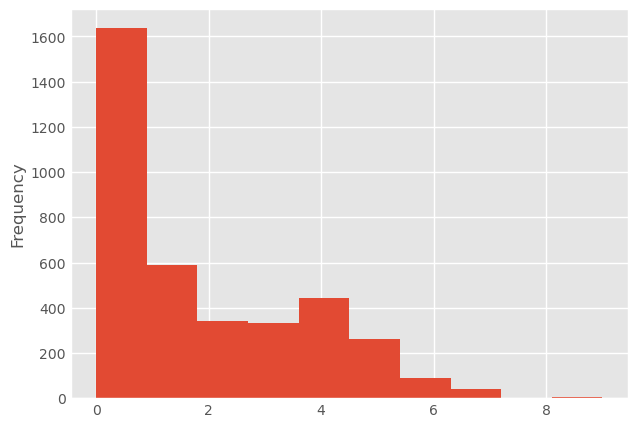

In [1810]:
weather.bad_conditions.plot(kind="hist")

In [1811]:
weather.bad_conditions.value_counts().sort_index()

0    1638
1     587
2     342
3     334
4     445
5     262
6      90
7      41
8       2
9       3
Name: bad_conditions, dtype: int64

In [1812]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

In [1813]:
weather['rating'] = weather.bad_conditions.map(mapping)

In [1814]:
weather['rating']

0       good
1        bad
2        bad
3        bad
4        bad
        ... 
3739     bad
3740    good
3741     bad
3742     bad
3743     bad
Name: rating, Length: 3744, dtype: object

In [1815]:
weather.rating.value_counts()

bad      1708
good     1638
worse     398
Name: rating, dtype: int64

In [1816]:
cats = pd.CategoricalDtype(['good','bad','worse'], ordered=True)

In [1817]:
weather['rating'] = weather.rating.astype(cats)

In [1818]:
weather.rating.head()

0    good
1     bad
2     bad
3     bad
4     bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [1819]:
df.head()

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
date_time,,,,,,,,,,,,,,,
2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [1820]:
df.reset_index(inplace=True)

In [1821]:
df.head()

,date_time,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
0,2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
1,2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2,2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
3,2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
4,2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [1822]:
weather["DATE"]=weather.DATE.str.replace("/","-")

In [1823]:
weather.head()

,STATION,NAME,DATE,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,...,WT16,WT17,WT18,WT19,WT21,WT22,WV20,TDIFF,bad_conditions,rating
0,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",01-10-2005,5.37,1432.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,0,good
1,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",02-10-2005,2.91,1510.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,2,bad
2,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",03-10-2005,4.03,1457.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,2,bad
3,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",04-10-2005,4.47,1547.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,3,bad
4,USW00014765,"RHODE ISLAND T.F. GREEN INTERNATIONAL AIRPORT,...",05-10-2005,3.80,1515.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,4,bad


In [1824]:
weather_rating=weather[["DATE","rating"]]

In [1825]:
df.head().sort_values("date")

,date_time,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation
1,2005-01-10 12:20:00,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
2,2005-01-10 12:30:00,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
3,2005-01-10 12:50:00,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
4,2005-01-10 13:10:00,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False
0,2005-11-22 11:15:00,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False


In [1826]:
weather.shape

(3744, 42)

In [1827]:
df.shape

(509671, 16)

In [1828]:
df_weather=pd.merge(left=df,right=weather_rating,left_on="date",right_on="DATE",how="left")
df_weather.sort_values("date")

,date_time,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation,DATE,rating
15476,2006-01-01 07:55:00,01-01-2006,07:55:00,K3,white,male,300,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-01-2006,bad
15849,2006-01-01 03:55:00,01-01-2006,03:55:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,True,01-01-2006,bad
15198,2006-01-01 09:35:00,01-01-2006,09:35:00,K3,white,male,300,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-01-2006,bad
17183,2006-01-01 02:30:00,01-01-2006,02:30:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-01-2006,bad
17172,2006-01-01 01:50:00,01-01-2006,01:50:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-01-2006,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486216,2015-12-31 21:32:00,31-12-2015,21:32:00,X3,black,male,200.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Registration Violation,True,31-12-2015,bad
486217,2015-12-31 22:04:00,31-12-2015,22:04:00,X3,white,male,200.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,True,31-12-2015,bad
486218,2015-12-31 23:08:00,31-12-2015,23:08:00,X3,hispanic,male,200.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,True,31-12-2015,bad
470771,2015-12-31 20:49:00,31-12-2015,20:49:00,K2,white,male,900.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,True,31-12-2015,bad


In [1829]:
df_weather.set_index("date",inplace=True)
df_weather.head()

,date_time,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,violation,DATE,rating
date,,,,,,,,,,,,,,,,,
22-11-2005,2005-11-22 11:15:00,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,22-11-2005,bad
01-10-2005,2005-01-10 12:20:00,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-10-2005,good
01-10-2005,2005-01-10 12:30:00,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-10-2005,good
01-10-2005,2005-01-10 12:50:00,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-10-2005,good
01-10-2005,2005-01-10 13:10:00,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,False,01-10-2005,good


In [1830]:
df.date.head().sort_values()

1    01-10-2005
2    01-10-2005
3    01-10-2005
4    01-10-2005
0    22-11-2005
Name: date, dtype: object

In [ ]:
df_weather.shape

(509671, 18)

In [ ]:
df.shape

(509671, 16)

In [1833]:
df_weather.arrest_made.mean()

0.034545825287968575

In [1842]:
df_weather.groupby("rating").arrest_made.mean()

rating
good     0.032996
bad      0.035182
worse    0.039354
Name: arrest_made, dtype: Float64

In [1856]:
arrest_rate=df_weather.groupby(["reason_for_stop","rating"]).arrest_made.mean()
arrest_rate

reason_for_stop                   rating
APB                               good      0.239496
                                  bad       0.284314
                                  worse     0.372093
Call for Service                  good      0.175385
                                  bad       0.187038
                                  worse     0.177592
Equipment/Inspection Violation    good      0.056461
                                  bad        0.05971
                                  worse     0.094446
Motorist Assist/Courtesy          good      0.116009
                                  bad       0.103371
                                  worse     0.070175
Other Traffic Violation           good       0.05558
                                  bad       0.057891
                                  worse     0.062116
Registration Violation            good      0.076831
                                  bad        0.09277
                                  worse     0.098673
Seatb

In [1857]:
arrest_rate.loc["Speeding"]

rating
good     0.013212
bad      0.013372
worse     0.01661
Name: arrest_made, dtype: Float64

In [1860]:
df_arrest_rate=arrest_rate.unstack()
df_arrest_rate

rating,good,bad,worse
reason_for_stop,,,
APB,0.239496,0.284314,0.372093
Call for Service,0.175385,0.187038,0.177592
Equipment/Inspection Violation,0.056461,0.05971,0.094446
Motorist Assist/Courtesy,0.116009,0.103371,0.070175
Other Traffic Violation,0.05558,0.057891,0.062116
Registration Violation,0.076831,0.09277,0.098673
Seatbelt Violation,0.025498,0.02884,0.0
Special Detail/Directed Patrol,0.009456,0.009619,0.004739
Speeding,0.013212,0.013372,0.01661


<AxesSubplot:ylabel='reason_for_stop'>

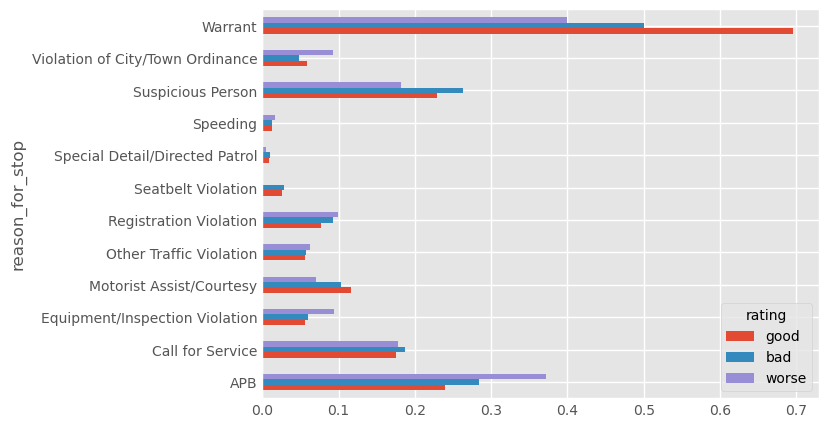

In [1871]:
df_arrest_rate.plot(kind="barh")

<AxesSubplot:ylabel='reason_for_stop'>

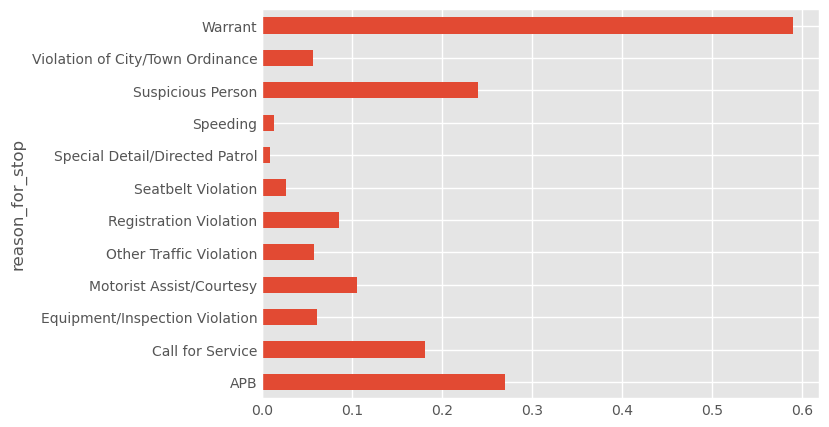

In [1870]:
df.groupby("reason_for_stop").arrest_made.mean().plot(kind="barh")